In [4]:
import importlib
import matplotlib.pyplot as plt
import sys

sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Evolution_of_the_entropy/')
sys.path.append('/home/hcleroy/aging_condensate/Evolution_of_the_Entropy')
import Parallel_Run_Average_Entropy_Shared_Mem
importlib.reload(Parallel_Run_Average_Entropy_Shared_Mem)
from Parallel_Run_Average_Entropy_Shared_Mem import *


sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/Analysis/')
sys.path.append('/home/hugo/PostDoc/aging_condensates/Gillespie/Analysis/')
import ToolBox
importlib.reload(ToolBox)
from ToolBox import *

sys.path.append('/home/hcleroy/Extra_Module_py')
sys.path.append('/home/hugo/Extra_Module_py')
sys.path.append('/home/hcleroy/Extra_Module_py')
import formated_matplotlib

Ec = lambda L,N : 3/2*np.log(L/N* np.pi/3)

In [6]:
# gillespie parameter
Nlinker = 20
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = ell_tot/(V) # for 1D
Energy = -15
Nprocess = 300
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
print(Ec(ell_tot,Nlinker))
print(np.exp(Energy))
# Simulation parameters
step_tot = 2*10**6
compute_steps = 100

5.937210903914155
3.059023205018258e-07


In [7]:
print(kdiff)

39.93410833333335
5.230012500000001
0.44867483333333286


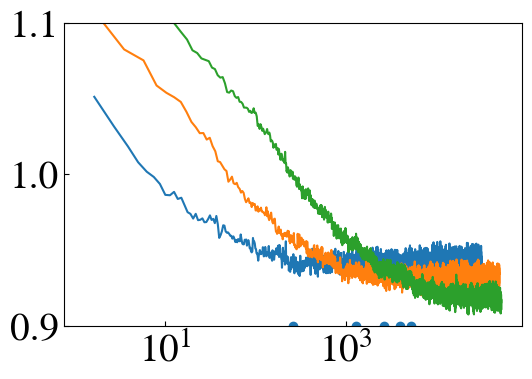

In [5]:
# import data with 300 processes
ST1 = np.load('kdiff_LsV.npy')
ST2 = np.load('kiff_Ls10V.npy')
ST3 = np.load('kiff_Ls100V.npy')
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set figure size in inches
mpl.rcParams['figure.figsize'] = [5.91, 3.94]

# Set text font
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams['font.family'] = 'Ubuntu'

# Use LaTeX for text rendering
mpl.rcParams['text.usetex'] = False

# Set font size in points
mpl.rcParams['font.size'] = 28.35

# For removing minor ticks when x axis is in log scale
from matplotlib.ticker import NullLocator
ax = plt.gca()
ax.xaxis.set_minor_locator(NullLocator())
plt.plot(ST1[2:,0],(ST1[2:,1]-Fmin(Nlinker,ell_tot,Energy))/(Fmax(Nlinker,ell_tot,Energy)-Fmin(Nlinker,ell_tot,Energy)))
plt.plot(ST2[:,0],(ST2[:,1]-Fmin(Nlinker,ell_tot,Energy))/  (Fmax(Nlinker,ell_tot,Energy)-Fmin(Nlinker,ell_tot,Energy)))
plt.plot(ST3[:,0],(ST3[:,1]-Fmin(Nlinker,ell_tot,Energy))/  (Fmax(Nlinker,ell_tot,Energy)-Fmin(Nlinker,ell_tot,Energy)))
plt.xscale('log')
plt.ylim(0.9,1.1)
plt.xticks([10,10**3,10**5])
plt.scatter([258,1303,2610,3919,5230],[0.9,0.9,0.9,0.9,0.9])
plt.savefig("entropy_t_kdiff.svg",transparent=True,bbox_inches='tight')

In [46]:
F = lambda R,L,N, E : -1.5*((N-1)*np.log(3*(N-1)/(2*np.pi*L)) -  R**2/L)-L*np.log(4*np.pi)+E*N

In [47]:
print(Fmax(Nlinker,ell_tot,Energy))
print(Fmin(Nlinker,ell_tot,Energy))
print(F(np.sqrt(ell_tot),ell_tot,Nlinker,Energy))

-138.9382981796726
-2831.0242469692907
-2695.500686258918


In [8]:
np.save('kdiff_LsV.npy',ST1)
np.save('kiff_Ls10V.npy',ST2)
np.save('kiff_Ls100V.npy',ST3)

In [10]:
for i in range(Nprocess):
    args[i][2] = 10*kdiff
ST0 = average_simulations(args,step_tot,compute_steps)
for i in range(Nprocess):
    args[i][2] = kdiff/1000
ST4 = average_simulations(args,step_tot,compute_steps)

89.19209499999997
0.09037499999999998


In [33]:
for i in range(Nprocess):
    args[i][2] = 100*kdiff
ST_1 = average_simulations(args,step_tot,compute_steps)
for i in range(Nprocess):
    args[i][2] = 1000*kdiff
ST_2 = average_simulations(args,step_tot,compute_steps)

99.04162299999999
99.91533999999996


In [17]:
step_tot = 2*10**7
compute_steps = 500
Nprocess = 50
args = [[ell_tot,Energy,kdiff/100,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]

ST3 = average_simulations(args,step_tot,compute_steps)

0.4307296999999999


In [30]:
(kdiff/100).hex()

'0x1.210e1c99f615dp-8'

In [31]:
np.save('kdiff_'+(kdiff/100).hex()+'_ttot_2E7.npy',ST3)
np.save('kdiff_'+(kdiff*10).hex()+'_ttot_2E6.npy',ST0)

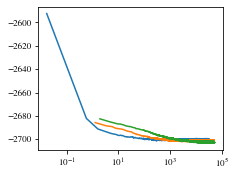

In [9]:
#plt.plot(ST_2[:,0],ST_2[:,1])
#plt.plot(ST_1[:,0],ST_1[:,1])
#plt.plot(ST0[:,0],ST0[:,1])#/abs(min(ST1[:,1])))
plt.plot(ST1[:,0],ST1[:,1])#/abs(min(ST1[:,1])))
plt.plot(ST2[:,0],ST2[:,1])#/abs(min(ST2[:,1])))
plt.plot(ST3[:,0],ST3[:,1])#/abs(min(ST3[:,1])))
#plt.plot(ST4[:,0],ST4[:,1])#/abs(min(ST1[:,1])))
#plt.ylim(-150,-120)
plt.xscale('log')
#plt.xlim(0.1,10**6)